In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os

In [3]:
df=pd.read_csv('twitter_training.csv',names=["id","company","kind","tweet"])
df.head()

,id,company,kind,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.tail()

,id,company,kind,tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
del df["id"]

In [6]:
df.isnull().sum()

company      0
kind         0
tweet      686
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(73996, 3)

In [8]:
df['kind'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: kind, dtype: int64

In [9]:
data_2 = df[df['kind']!='Irrelevant']
data_2.shape

(61121, 3)

In [10]:
df

,company,kind,tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
data_2.drop(columns=['company'],inplace=True)
data_2.head()

C:\Users\Prayag Chawla\AppData\Local\Temp\ipykernel_19752\2783730690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.drop(columns=['company'],inplace=True)


,kind,tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
data_2.iloc[500,1]


'Today ’ ′ s Show Best Game Winner Deals : FIFA 20 $ 18, against Borderlands 2 Handsome $ 15, more as – 9to5Toys 2016 uk. Retrieved googlehits. com / sales as - we - speaks - f …'

In [13]:
from bs4 import BeautifulSoup 
import re
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to C:\Users\Prayag
[nltk_data]     Chawla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
stopwords = stopwords.words("english")
stopwords.remove('not')
stopwords.remove('no')

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
def cleaned_review(review):
    # remove any html tags from the tab ctrl shift j
    new_review = BeautifulSoup(review).get_text()
    
    # remove urls from reviews
    no_urls = new_review.replace('http\S+', '').replace('www\S+', '')
    
    # remove any non-letters
    clean_review = re.sub("[^a-zA-Z]", " ", no_urls)
    
    # convert whole sentence to lowercase and split
    new_words = clean_review.lower().split()
    
    # converting stopwords list to set for faster search
    stops = set(stopwords)
    
    # using stopwords to remove irrelavent words and lemmatizing the final output
    final_words = [lemmatizer.lemmatize(word) for word in new_words if not word in stops]
    
    # return the final result
    return (" ".join(final_words))

In [17]:
data_2['msg'] = data_2['tweet'].apply(lambda x:cleaned_review(x))

C:\Users\Prayag Chawla\AppData\Roaming\Python\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Prayag Chawla\AppData\Local\Temp\ipykernel_19752\2341982275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['msg'] = data_2['tweet'].apply(lambda x:cleaned_review(x))


In [18]:
print(data_2.iloc[1000,1])
print(data_2.iloc[1000,2])

Eli Whitney Roth International is making a movie based loosely on using the game,.. bit. ly / on 2wv4KHM
eli whitney roth international making movie based loosely using game bit ly wv khm


C:\Users\Prayag Chawla\AppData\Local\Temp\ipykernel_19752\2213387744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['n_words'] = data_2['msg'].apply(lambda x:len(x.split()))


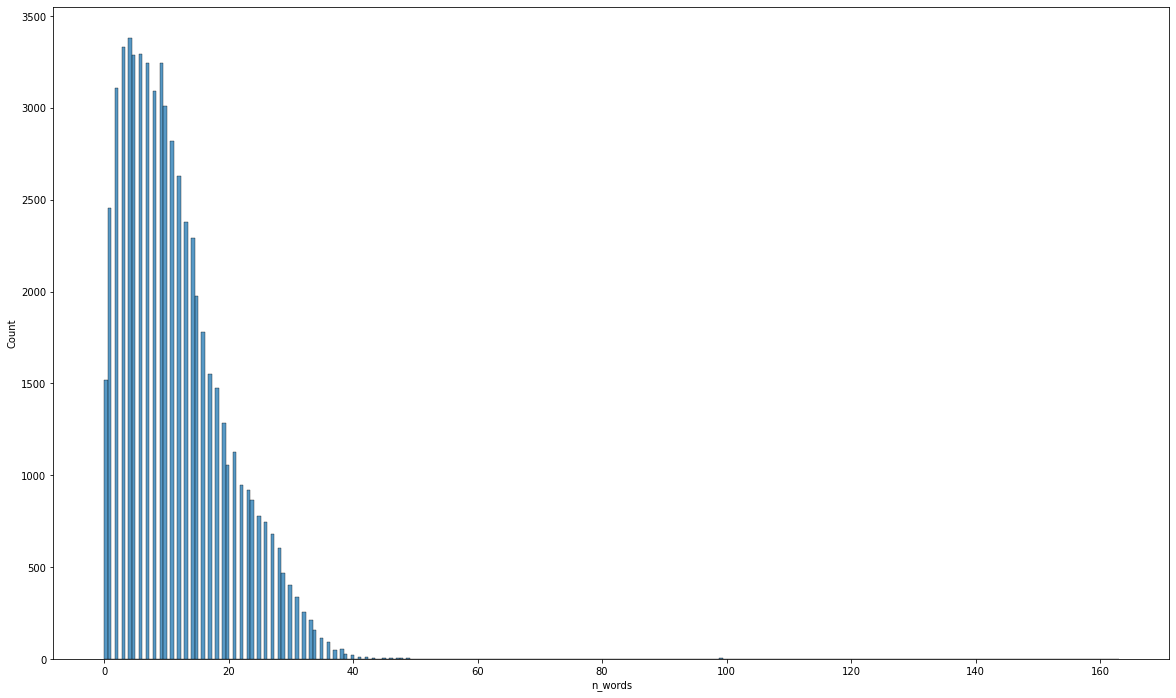

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 12))
data_2['n_words'] = data_2['msg'].apply(lambda x:len(x.split()))
sns.histplot(data = data_2, x='n_words')
plt.show()

In [20]:
max_len = 40

In [21]:
sentiment = pd.get_dummies(data_2['kind'])
data_3 = pd.concat([data_2,sentiment],axis=1)
data_3.head()

,kind,tweet,msg,n_words,Negative,Neutral,Positive
0,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder,4,0,0,1
1,Positive,I am coming to the borders and I will kill you...,coming border kill,3,0,0,1
2,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill,4,0,0,1
3,Positive,im coming on borderlands and i will murder you...,im coming borderland murder,4,0,0,1
4,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder,4,0,0,1


In [22]:
data_3.drop(columns=['kind','tweet','n_words'],inplace=True)

In [23]:
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences

# now we will tokenize the words to sequence so that our model can understand
# we will also pad the sentences with less than 40 words to make size of each sentence equal
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_3['msg'].values)
sequences = tokenizer.texts_to_sequences(data_3['msg'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=max_len, padding='post')

Found 23091 unique tokens.


In [24]:
X[500]

array([  66,  190,   31,    1, 1221,  346,   58,   56, 1480, 2993,  225,
       6371, 5930,    2,  402, 5931,  240,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [25]:
y=data_3[['Negative','Neutral','Positive']]
y.shape

(61121, 3)

In [26]:
from sklearn.model_selection import train_test_split

# splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
X_train.shape,X_test.shape

((60509, 40), (612, 40))

In [27]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, SpatialDropout1D, Embedding, LSTM
model = Sequential()

In [28]:
n_most_words = 23092
n_dim = 50
model.add(Embedding(n_most_words,n_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.25,recurrent_dropout=0.25))
model.add(Dense(25,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            1154600   
                                                                 
 spatial_dropout1d (SpatialD  (None, 40, 50)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 1,176,153
Trainable params: 1,176,153
Non-trainable params: 0
______________________________________________

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
early_stop = EarlyStopping(patience=5)
model_history = model.fit(X_train,y_train,epochs=30,validation_split = 0.1, batch_size = 128 ,callbacks=[checkpoint,early_stop])

Epoch 1/30
426/426 [==============================] - 46s 86ms/step - loss: 0.8854 - acc: 0.5645 - val_loss: 0.5982 - val_acc: 0.7645
Epoch 2/30
426/426 [==============================] - 40s 95ms/step - loss: 0.4700 - acc: 0.8231 - val_loss: 0.4023 - val_acc: 0.8409
Epoch 3/30
426/426 [==============================] - 42s 98ms/step - loss: 0.3391 - acc: 0.8727 - val_loss: 0.3585 - val_acc: 0.8673
Epoch 4/30
426/426 [==============================] - 39s 91ms/step - loss: 0.2845 - acc: 0.8938 - val_loss: 0.3323 - val_acc: 0.8732
Epoch 5/30
426/426 [==============================] - 39s 92ms/step - loss: 0.2525 - acc: 0.9046 - val_loss: 0.3349 - val_acc: 0.8794
Epoch 6/30
426/426 [==============================] - 45s 105ms/step - loss: 0.2299 - acc: 0.9121 - val_loss: 0.3475 - val_acc: 0.8794
Epoch 7/30
426/426 [==============================] - 39s 92ms/step - loss: 0.2138 - acc: 0.9169 - val_loss: 0.3181 - val_acc: 0.8812
Epoch 8/30
426/426 [==============================] - 40s 93m

In [30]:
model.load_weights('weights.hdf5')
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

20/20 [==============================] - 0s 9ms/step - loss: 0.3059 - acc: 0.8954
Test set
  Loss: 0.306
  Accuracy: 0.895


In [31]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

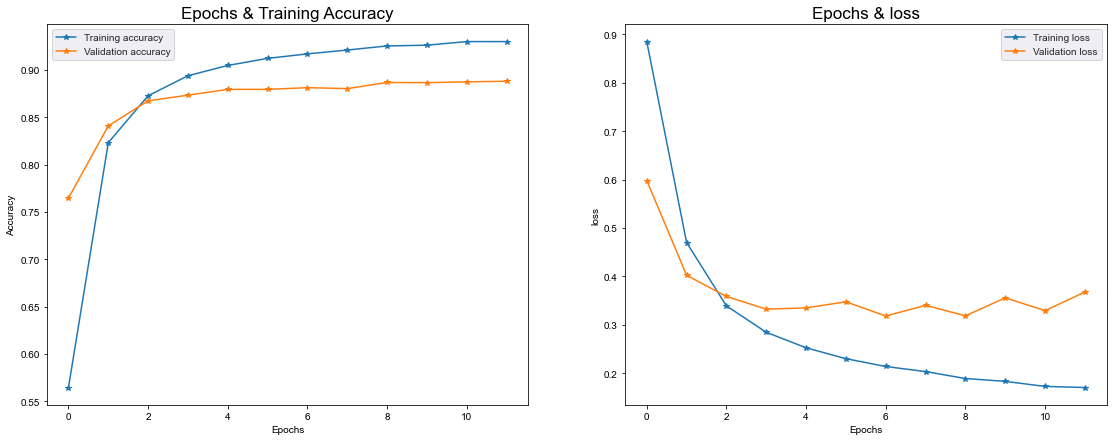

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, '*-',label = 'Training accuracy')
ax[0].plot(val_acc, '*-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, '*-',label = 'Training loss')
ax[1].plot(val_loss, '*-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

In [33]:
def find_sentiment(review):
    seq = tokenizer.texts_to_sequences(review)
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)
    label = ['Negative','Neutral','Positive']
    return label[np.argmax(pred)]

In [34]:
df.iloc[2000]

company                                          Borderlands
kind                                                 Neutral
tweet      Borderlands 3. Firebug (). Sabotage all states...
Name: 2006, dtype: object

In [41]:
print(find_sentiment(["@ EpicGames @ 2K @ Steam Why add a crossplay for @ Borderlands 3 if you're not going to make it compatible for the console?"]))

1/1 [==============================] - 0s 300ms/step
Negative


In [40]:
v_data = pd.read_csv('twitter_training.csv',header=None)
v_data.head()


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [39]:
v_data = v_data[v_data[2]!='Irrelevant']

In [47]:
v_data['predicted'] = v_data[3].apply(lambda x:find_sentiment([x])if type(v_data) == str else False)

In [49]:
v_data.head(100)

,0,1,2,3,predicted
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,False
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,False
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,False
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,False
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,False
...,...,...,...,...,...
95,2416,Borderlands,Neutral,I hate that this easy horrible modifier event ...,False
96,2417,Borderlands,Negative,Grounded almost looked pretty cool even despit...,False
97,2417,Borderlands,Negative,Grounded looked cool despite the borderline un...,False
98,2417,Borderlands,Negative,"Grosskreutz looked pretty cool, even despite t...",False
